# 📊 Data Understanding & EDA – Bank Marketing Dataset

Nodebook này sẽ thực hiện các bước:
1. Load dataset từ file CSV.
2. Thống kê mô tả dữ liệu (numeric + categorical).
3. Kiểm tra mất cân bằng lớp (class imbalance).
4. Vẽ các biểu đồ cơ bản (histogram, bar chart, boxplot, heatmap).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình style
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("../data/bank-full.csv", sep=";", quotechar='"', engine="python")

# Xem dữ liệu cơ bản
print(df.shape)
# print(df.head())
print(df.columns.tolist())
print(df.info())


(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y  

## 📌 Thống kê mô tả dữ liệu

Phần này thực hiện:
- Liệt kê các biến numeric và categorical.
- Tính toán thống kê cơ bản (mean, median, min, max, std).
- Xem tần suất xuất hiện của các biến categorical.

In [2]:
# Numeric features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(df[numeric_cols].describe())
# print("Numeric columns:", numeric_cols.tolist())


# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True).head())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

## ⚖️ Kiểm tra Class Imbalance

Biến mục tiêu `y` là nhãn (yes/no).  
Cần xem phân phối có bị mất cân bằng hay không.

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


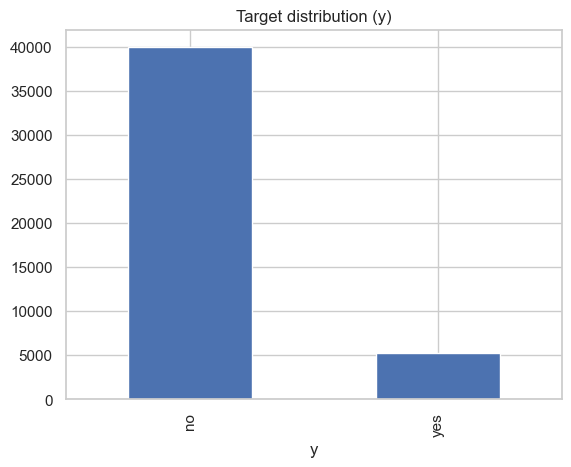

In [3]:
print(df['y'].value_counts(normalize=True))
df['y'].value_counts().plot(kind='bar')
plt.title("Target distribution (y)")
plt.show()


## 📈 Biểu đồ phân phối

Thực hiện trực quan hóa:
- Histogram và Boxplot cho numeric.
- Bar chart cho categorical.
- Heatmap cho tương quan giữa các biến numeric.

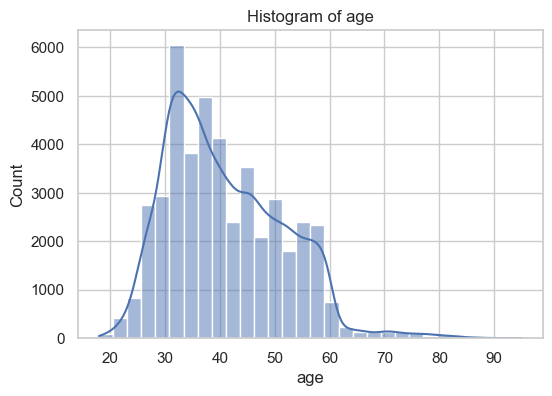

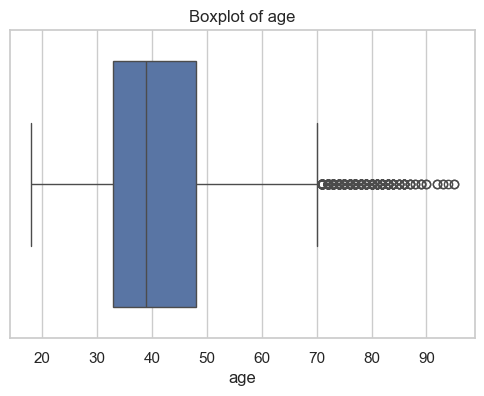

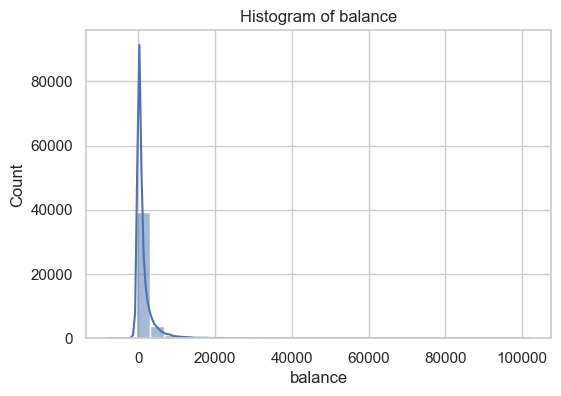

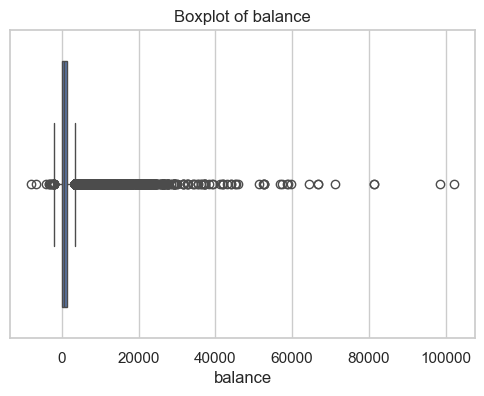

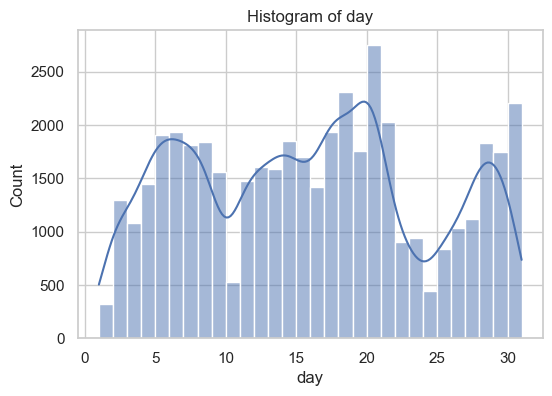

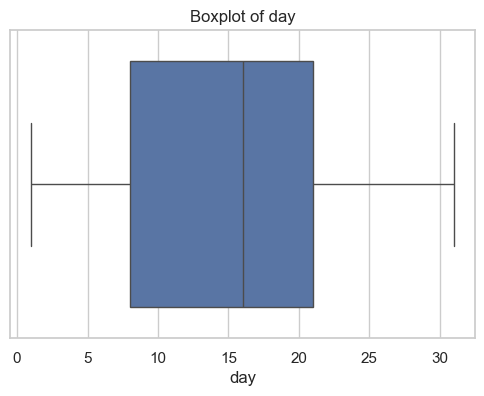

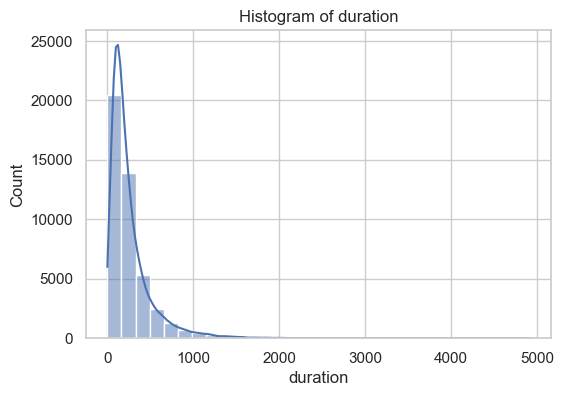

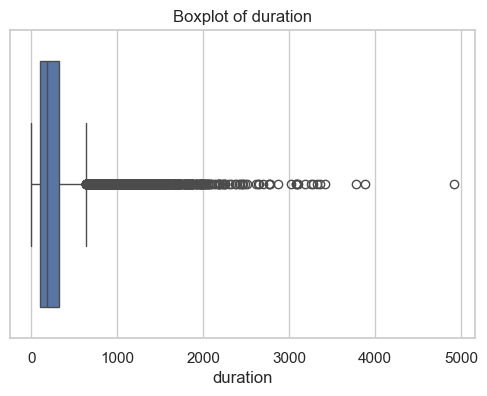

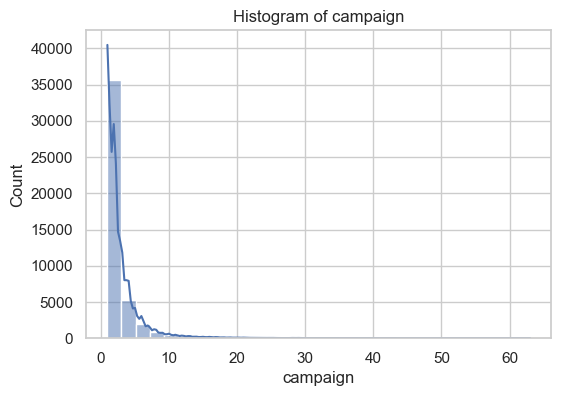

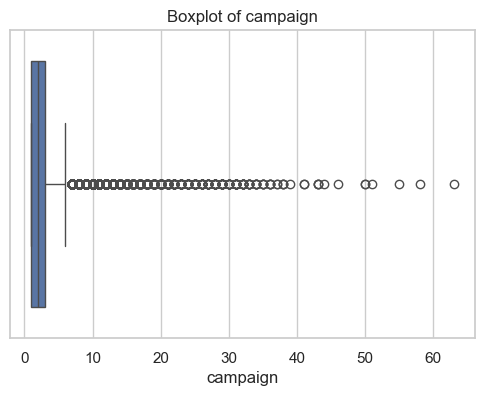

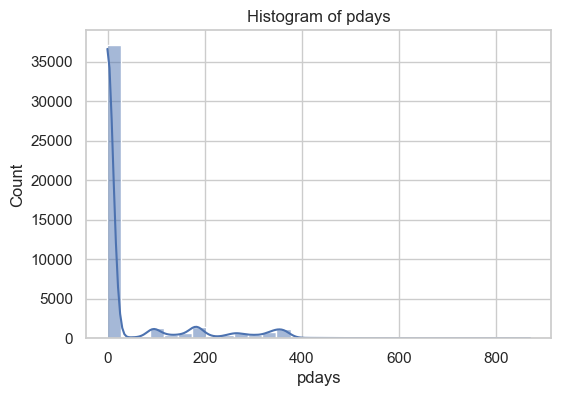

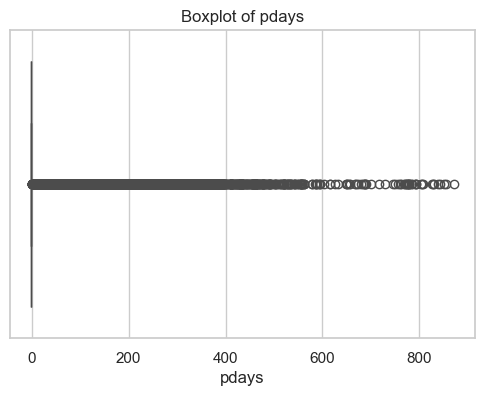

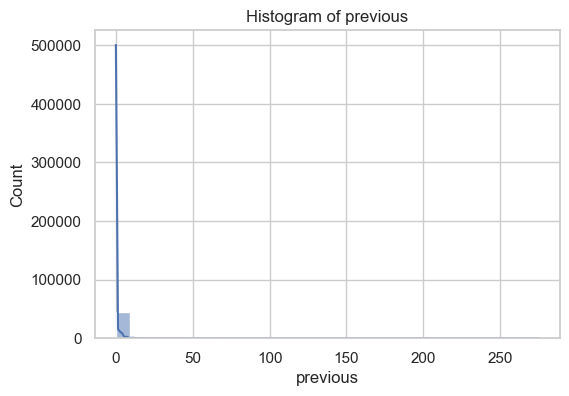

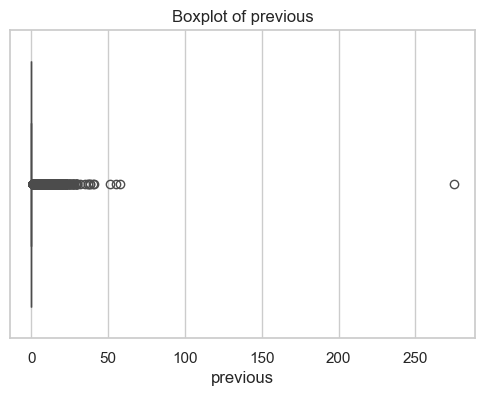

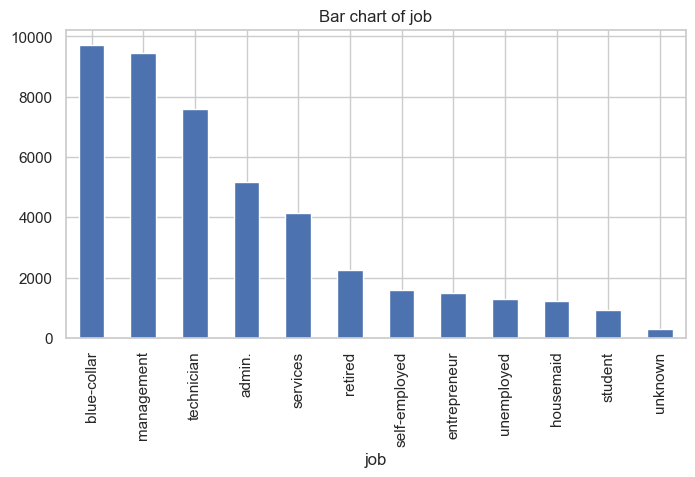

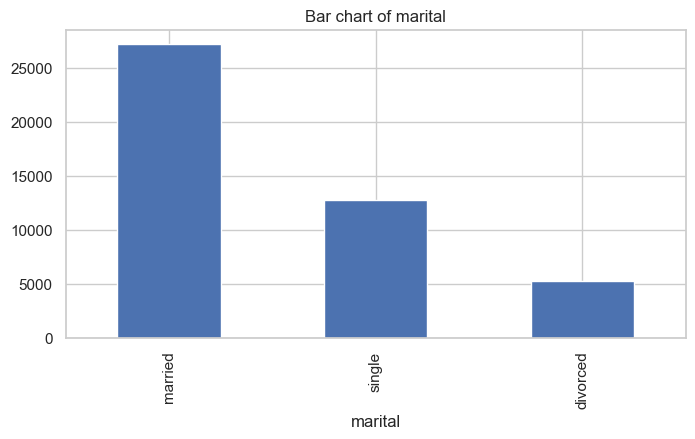

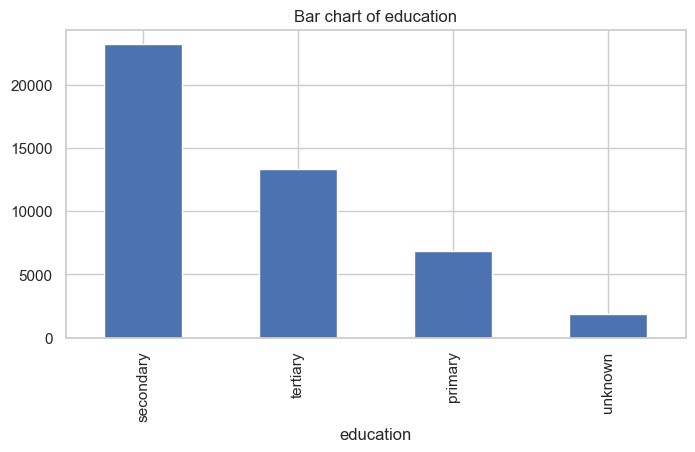

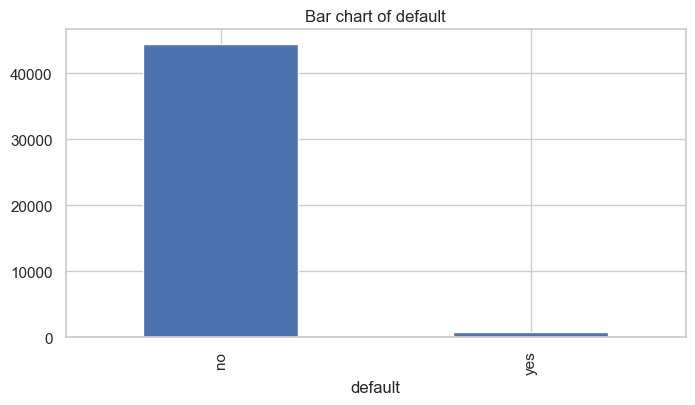

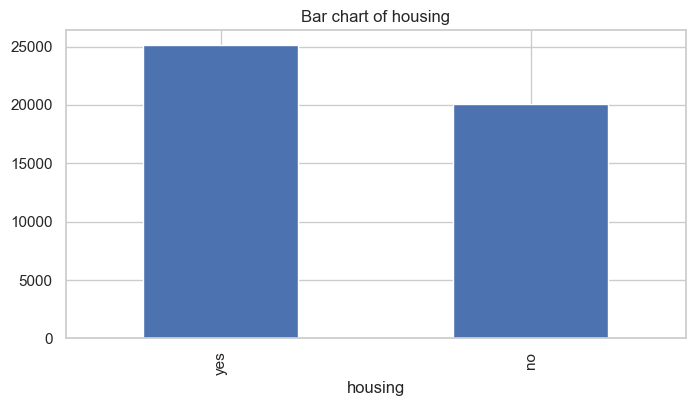

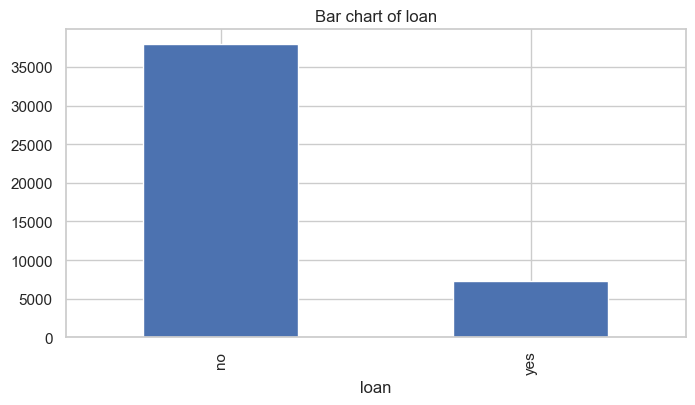

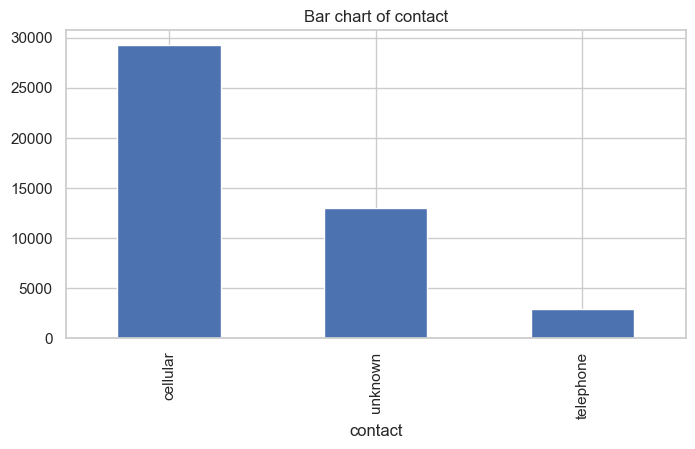

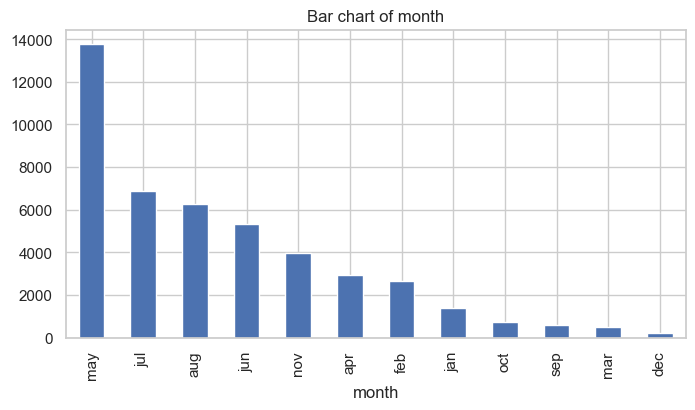

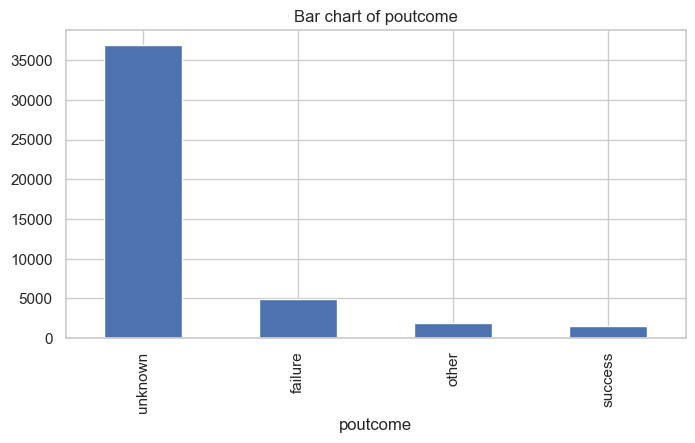

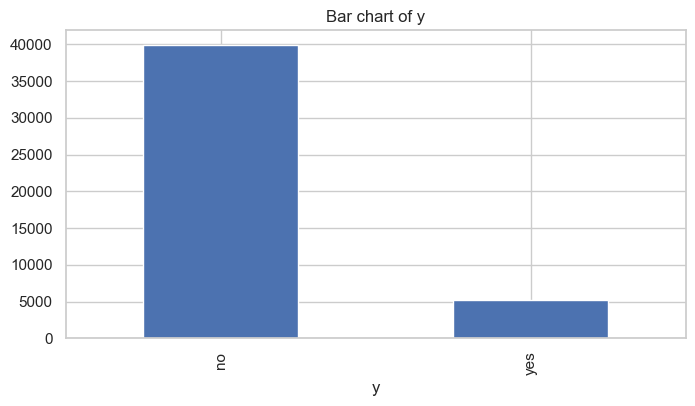

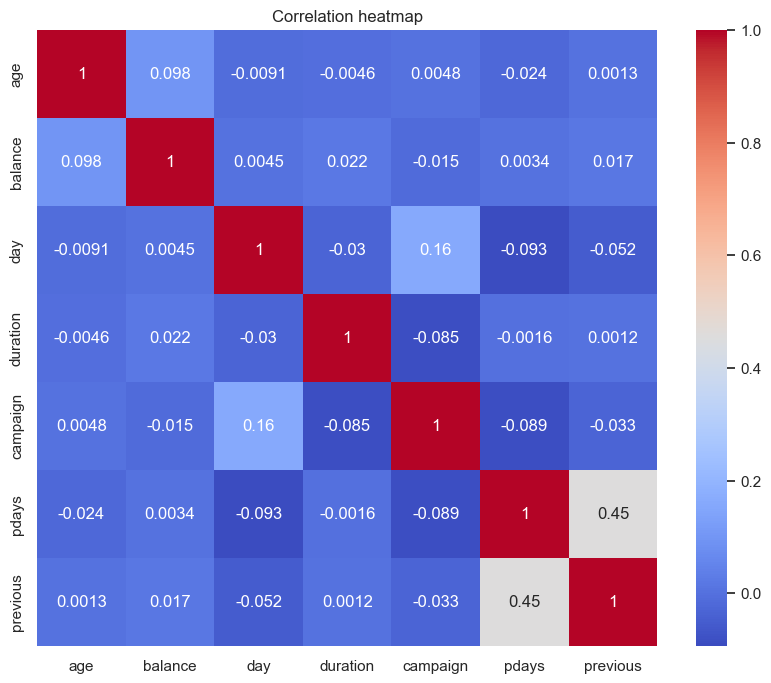

In [4]:
# Histogram & Boxplot cho numeric
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Bar chart cho categorical
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar chart of {col}")
    plt.show()

# Heatmap tương quan numeric
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()
